# 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set(rc={'figure.figsize': [12, 8]}, font_scale=1.2)

## 2) Load Data

In [2]:
df = pd.read_csv('117 01Students.csv')
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


## 3) Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


## 4) Data Preprocessing

a) Check null values

In [5]:
mark_mean = df["Marks"].mean()
df.fillna(df.mean(), inplace=True)

b) Scalling

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(df) 

StandardScaler(copy=True, with_mean=True, with_std=True)

c) Descriptive analysis

In [7]:
import statistics as st

In [8]:
# st.mean(df["Marks"])
mark_mean = df["Marks"].mean()
mark_mean

61.4

In [9]:
mark_mean = df["Marks"].mean()
df.fillna(df.mean(), inplace=True)

In [10]:
# st.median(df["Marks"])
df["Marks"].median()

60.0

In [11]:
df["Marks"].std()

17.734828387414254

# Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

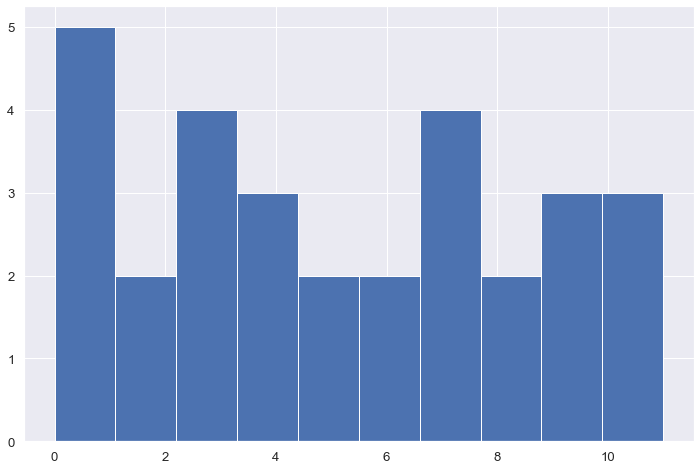

In [13]:
df["Hours"].hist(bins=10) 

the most hour that student study {1,3,7}

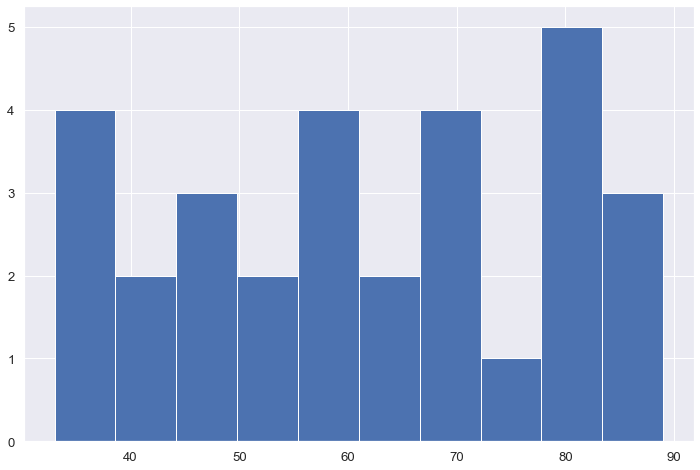

In [14]:
df["Marks"].hist(bins=10)


The highest mark {80,70,60,30}


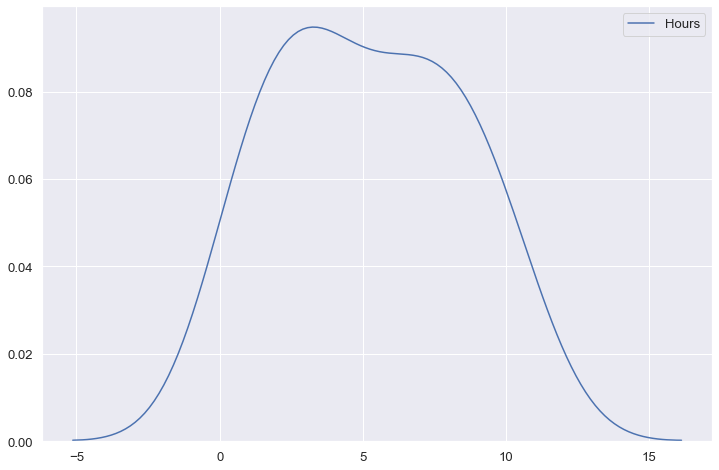

In [15]:
sns.kdeplot(df["Hours"] )

The highest value for hours [3,7]

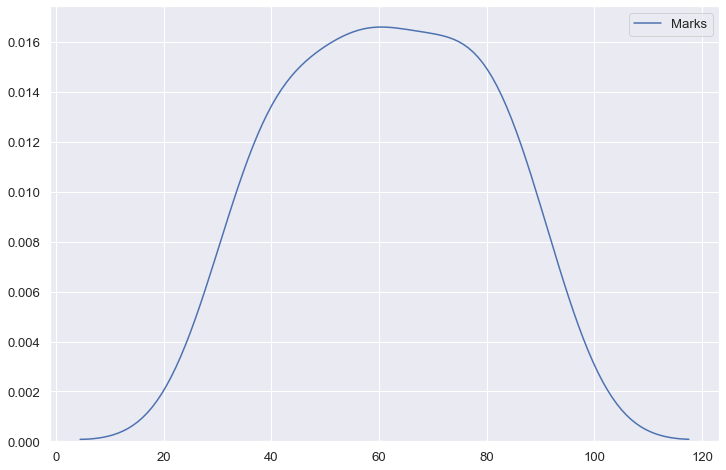

In [16]:
sns.kdeplot(df["Marks"])

most marks we get from [50,80]

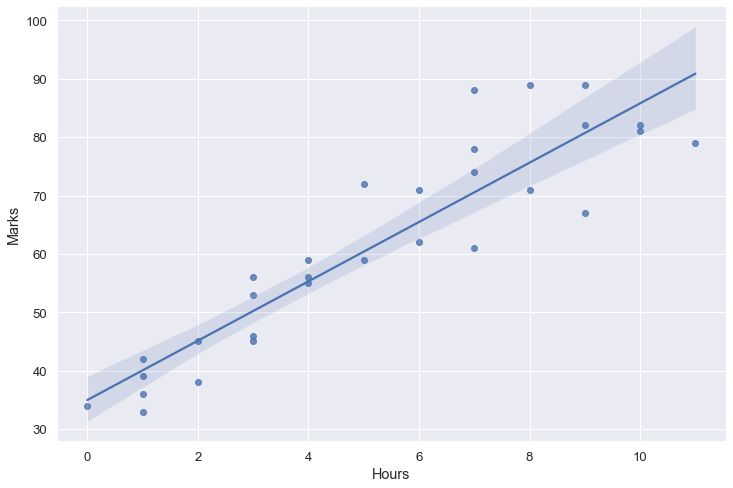

In [17]:
sns.regplot(y=df["Marks"],x=df["Hours"])

The relationship between hours and marks is positive relation that means<br> if studying hours value increase then the marks will increase and vice versa.

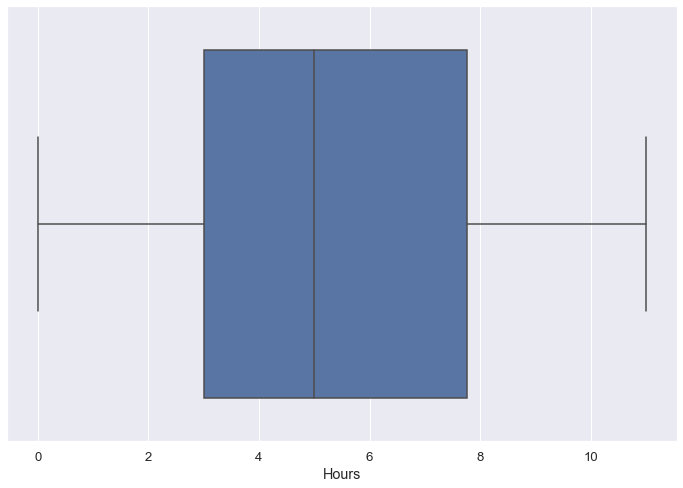

In [18]:
sns.boxplot(df["Hours"])

no outlier and data [0,11]

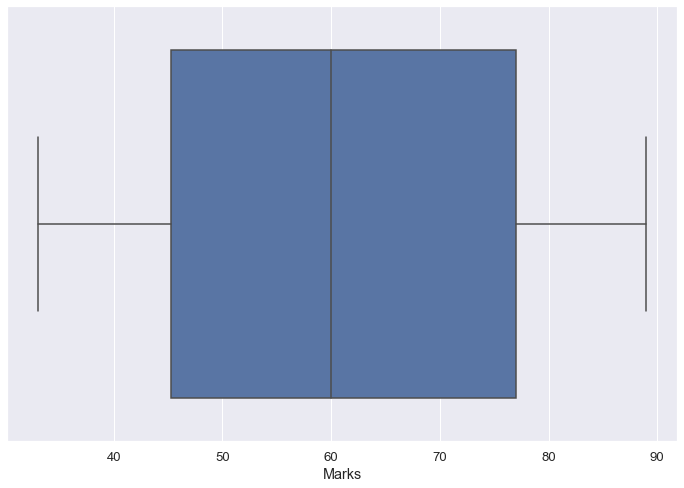

In [19]:
sns.boxplot(df["Marks"])

marks in range [33,89]

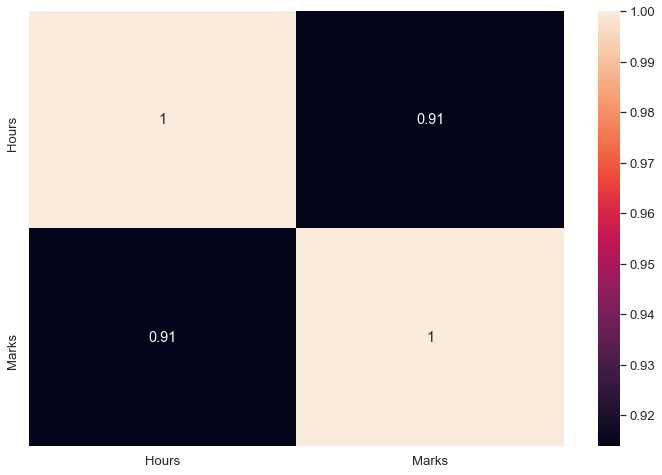

In [41]:
sns.heatmap(df.corr(),annot=True)

marks will increase by 91% if hours increase <br>which means that the correlation is very high between them.

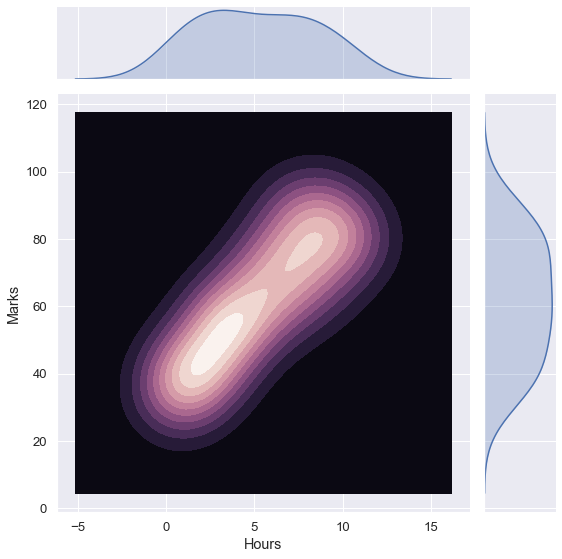

In [21]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.jointplot(x='Hours', y='Marks', data=df, kind='kde', cmap=cmap, height=8)

In [22]:
x = df['Hours'].values.reshape(-1, 1)
y = df['Marks']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
x_train.shape

(21, 1)

In [25]:
x_test.shape

(9, 1)

In [26]:
y_train.shape

(21,)

In [27]:
y_test.shape

(9,)

# 5) Train Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 6) Test Model on x_test

In [30]:
y_pred = model.predict(x_test)
y_pred

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [31]:
y_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

# 7) Calculate R2 Score

In [32]:
model.score(x_train, y_train)

0.8111744903394345

In [33]:
model.score(x_test, y_test)

0.8538655334937388

# 8) Calculate Root Mean Square Error

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.6499789690002835

# 9) Test Model on custom data

In [36]:
model.predict([[0]])

array([34.87037882])

In [37]:
model.predict([[11]])

array([90.06366956])

# 10) Get Model Parameters

In [38]:
model.coef_ # weight for x

array([5.01757188])

In [39]:
model.intercept_ # #b0

34.87037882245548

h(x) = 34.87037882245551 + 5.01757188 * x

# 11) Visualize Model

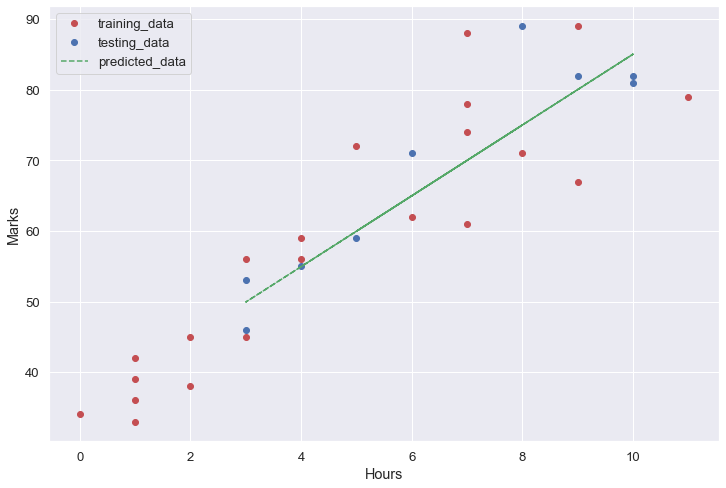

In [40]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g--', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()